In [ ]:
!pip install roboflow
from roboflow import Roboflow
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
import os
from PIL import Image, ImageDraw
import pandas as pd
pd.set_option('display.max_columns', None)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 kB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 8.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 6.2 MB/s eta 0:00:00
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9657 sha256=1ae4be4693ea513a4eba0d19ed2f50465cdefca745f393e66832f8816d6b036e
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built wget
  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 3.0.9
    Uninstalling pyparsing-3.0.9:
      Successfully uninstalled pyparsing-3.0.9
  Attempting uninstall: idna
    Found existing installation: idna 3.4
    Uninstalling idna-3.4:
    

In [ ]:
rf = Roboflow(api_key="xw35YyNnvd19WHlauQev")

#box model

In [ ]:
project = rf.workspace().project("gp-sinuses")
model_box = project.version(7).model

loading Roboflow workspace...
loading Roboflow project...


#segmentation model

In [ ]:
project = rf.workspace().project("gp-segmentation")
model_seg = project.version(4).model

loading Roboflow workspace...
loading Roboflow project...


#visualize your prediction for both models

In [ ]:
image = cv2.imread('/content/drive/MyDrive/DVD Cases /Case-19/images/IMG51.jpg')

##raw image

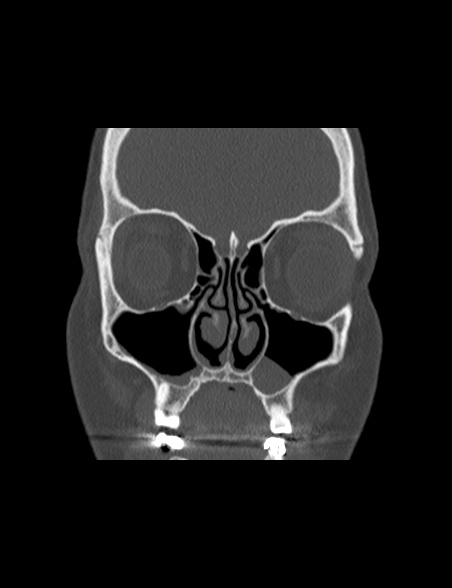

In [ ]:
cv2_imshow(image)

##box model visualization

In [ ]:
results = model_box.predict("/content/drive/MyDrive/DVD Cases /Case-19/images/IMG51.jpg").json()
# convert image to numpy (for convenience)
imArray = np.asarray(Image.open("/content/drive/MyDrive/DVD Cases /Case-19/images/IMG51.jpg").convert("RGBA"))

In [ ]:
for index, prediction in enumerate(results["predictions"]):

  roi_x = int(prediction['x'] - prediction['width'] / 2)
  roi_y = int(prediction['y'] - prediction['height'] / 2)
  roi_width = int(prediction['width'])
  roi_height = int(prediction['height'])

  roi = image[roi_y:roi_y+roi_height, roi_x:roi_x+roi_width]
  print(prediction["class"])
  cv2_imshow(roi)
  print("\n \n")

ant.ethmoid L



 

crista galli



 

septum



 

ant.ethmoid R


##segmentation model visualization

In [ ]:
# perform inference on the image
results = model_seg.predict("/content/drive/MyDrive/DVD Cases /Case-19/images/IMG51.jpg").json()
# convert image to numpy (for convenience)
imArray = np.asarray(Image.open("/content/drive/MyDrive/DVD Cases /Case-19/images/IMG51.jpg").convert("RGBA"))

maxillary R


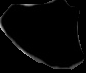


 

maxillary L


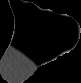


 

inferior turbinate


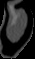


 

inferior turbinate


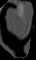


 

maxillary L


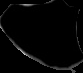

In [ ]:
# process each resulting prediction 
for index, prediction in enumerate(results["predictions"]):
  

  # convert polygon prediction points to workable tuple format
  polygon = [(point_obj["x"], point_obj["y"]) for point_obj in prediction["points"]]

  # create a mask image
  maskIm = Image.new('L', (imArray.shape[1], imArray.shape[0]), 0)
  ImageDraw.Draw(maskIm).polygon(polygon, outline=1, fill=1)

  gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  new_img=gray_image*maskIm

  # cv2_imshow(new_img)

  roi_x = int(prediction['x'] - prediction['width'] / 2)
  roi_y = int(prediction['y'] - prediction['height'] / 2)
  roi_width = int(prediction['width'])
  roi_height = int(prediction['height'])

  roi = new_img[roi_y:roi_y+roi_height, roi_x:roi_x+roi_width]
  print(prediction["class"])
  cv2_imshow(roi)
  print("\n \n")

#functions

In [ ]:
       
def p_ratio(image):       
      # gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
      #range of gray values
      value_min = 28
      value_max = 94
      mask = np.logical_and(image >= value_min, image <= value_max)
      count_gray = np.count_nonzero(mask)

      #range of black values
      value_min = 0
      value_max = 20
      mask = np.logical_and(image >= value_min, image <= value_max)
      count_black = np.count_nonzero(mask)

      ratio=count_gray/(count_black+count_gray)

      # print(ratio)

      return ratio

In [ ]:
def area(image):
      height, width = image.shape
      area=height*width
      return area

In [ ]:
def count_gray(image):
      value_min = 28
      value_max = 94
      mask = np.logical_and(image >= value_min, image <= value_max)
      count_gray = np.count_nonzero(mask)
      return count_gray


In [ ]:
def count_black(image):
      value_min = 0
      value_max = 20
      mask = np.logical_and(image >= value_min, image <= value_max)
      count_black = np.count_nonzero(mask)
      return count_black

In [ ]:
def clear_lists():
  count_maxillary_R=[0]*6
  count_maxillary_L=[0]*6
  count_frontal=[0]*6
  count_int_R=[0]*6
  count_int_L=[0]*6
  count_post_R=[0]*6
  count_post_L=[0]*6
  count_sphenoid_R=[0]*6
  count_sphenoid_L=[0]*6
  count_septum=[0]*6
  count_inferior_turbinate=[0]*6
  count_concha_ratio=[0]*6
  count_concha_black=[0]*6
  count_concha_size=[0]*6
  count_nasopharynx=[0]*6

In [ ]:
def calculate(i):
  data.loc[i:i, 'maxillary R gray/black ratio']=np.mean(count_maxillary_R)
  data.loc[i:i, 'm_r_std']=np.std(count_maxillary_R)
  data.loc[i:i, 'm_r_1']=sorted(count_maxillary_R, reverse=True)[:1]
  data.loc[i:i, 'm_r_2']=sorted(count_maxillary_R, reverse=True)[1:2]
  data.loc[i:i, 'm_r_3']=sorted(count_maxillary_R, reverse=True)[2:3]
  data.loc[i:i, 'm_r_4']=sorted(count_maxillary_R, reverse=True)[3:4]
  data.loc[i:i, 'm_r_5']=sorted(count_maxillary_R, reverse=True)[4:5]

  data.loc[i:i, 'maxillary L gray/black ratio']=np.mean(count_maxillary_L)
  data.loc[i:i, 'm_l_std']=np.std(count_maxillary_L)
  data.loc[i:i, 'm_l_1']=sorted(count_maxillary_L, reverse=True)[:1]
  data.loc[i:i, 'm_l_2']=sorted(count_maxillary_L, reverse=True)[1:2]
  data.loc[i:i, 'm_l_3']=sorted(count_maxillary_L, reverse=True)[2:3]
  data.loc[i:i, 'm_l_4']=sorted(count_maxillary_L, reverse=True)[3:4]
  data.loc[i:i, 'm_l_5']=sorted(count_maxillary_L, reverse=True)[4:5]




  data.loc[i:i, 'ant.ethmoid R gray/black ratio']=np.mean(count_int_R)
  data.loc[i:i, 'ant_r_std']=np.std(count_int_R)
  data.loc[i:i, 'ant_r_1']=sorted(count_int_R, reverse=True)[:1]
  data.loc[i:i, 'ant_r_2']=sorted(count_int_R, reverse=True)[1:2]
  data.loc[i:i, 'ant_r_3']=sorted(count_int_R, reverse=True)[2:3]
  data.loc[i:i, 'ant_r_4']=sorted(count_int_R, reverse=True)[3:4]
  data.loc[i:i, 'ant_r_5']=sorted(count_int_R, reverse=True)[4:5]

  data.loc[i:i, 'ant.ethmoid L gray/black ratio']=np.mean(count_int_L)
  data.loc[i:i, 'ant_l_std']=np.std(count_int_L)
  data.loc[i:i, 'ant_l_1']=sorted(count_int_L, reverse=True)[:1]
  data.loc[i:i, 'ant_l_2']=sorted(count_int_L, reverse=True)[1:2]
  data.loc[i:i, 'ant_l_3']=sorted(count_int_L, reverse=True)[2:3]
  data.loc[i:i, 'ant_l_4']=sorted(count_int_L, reverse=True)[3:4]
  data.loc[i:i, 'ant_l_5']=sorted(count_int_L, reverse=True)[4:5]


  data.loc[i:i, 'post.ethmoid R gray/black ratio']=np.mean(count_post_R)
  data.loc[i:i, 'post_r_std']=np.std(count_post_R)
  data.loc[i:i, 'post_r_1']=sorted(count_post_R, reverse=True)[:1]
  data.loc[i:i, 'post_r_2']=sorted(count_post_R, reverse=True)[1:2]
  data.loc[i:i, 'post_r_3']=sorted(count_post_R, reverse=True)[2:3]
  data.loc[i:i, 'post_r_4']=sorted(count_post_R, reverse=True)[3:4]
  data.loc[i:i, 'post_r_5']=sorted(count_post_R, reverse=True)[4:5]

  data.loc[i:i, 'post.ethmoid L gray/black ratio']=np.mean(count_post_L)
  data.loc[i:i, 'post_l_std']=np.std(count_post_L)
  data.loc[i:i, 'post_l_1']=sorted(count_post_L, reverse=True)[:1]
  data.loc[i:i, 'post_l_2']=sorted(count_post_L, reverse=True)[1:2]
  data.loc[i:i, 'post_l_3']=sorted(count_post_L, reverse=True)[2:3]
  data.loc[i:i, 'post_l_4']=sorted(count_post_L, reverse=True)[3:4]
  data.loc[i:i, 'post_l_5']=sorted(count_post_L, reverse=True)[4:5]


  data.loc[i:i, 'frontal gray/black ratio']=np.mean(count_frontal)
  data.loc[i:i, 'front_std']=np.std(count_frontal)
  data.loc[i:i, 'front_1']=sorted(count_frontal, reverse=True)[:1]
  data.loc[i:i, 'front_2']=sorted(count_frontal, reverse=True)[1:2]
  data.loc[i:i, 'front_3']=sorted(count_frontal, reverse=True)[2:3]
  data.loc[i:i, 'front_4']=sorted(count_frontal, reverse=True)[3:4]
  data.loc[i:i, 'front_5']=sorted(count_frontal, reverse=True)[4:5]

  data.loc[i:i, 'sphenoid R gray/black ratio']=np.mean(count_sphenoid_R)
  data.loc[i:i, 'sphen_r_std']=np.std(count_sphenoid_R)
  data.loc[i:i, 'sphen_r_1']=sorted(count_sphenoid_R, reverse=True)[:1]
  data.loc[i:i, 'sphen_r_2']=sorted(count_sphenoid_R, reverse=True)[1:2]
  data.loc[i:i, 'sphen_r_3']=sorted(count_sphenoid_R, reverse=True)[2:3]
  data.loc[i:i, 'sphen_r_4']=sorted(count_sphenoid_R, reverse=True)[3:4]
  data.loc[i:i, 'sphen_r_5']=sorted(count_sphenoid_R, reverse=True)[4:5]

  data.loc[i:i, 'sphenoid L gray/black ratio']=np.mean(count_sphenoid_L)
  data.loc[i:i, 'sphen_l_std']=np.std(count_sphenoid_L)
  data.loc[i:i, 'sphen_l_1']=sorted(count_sphenoid_L, reverse=True)[:1]
  data.loc[i:i, 'sphen_l_2']=sorted(count_sphenoid_L, reverse=True)[1:2]
  data.loc[i:i, 'sphen_l_3']=sorted(count_sphenoid_L, reverse=True)[2:3]
  data.loc[i:i, 'sphen_l_4']=sorted(count_sphenoid_L, reverse=True)[3:4]
  data.loc[i:i, 'sphen_l_5']=sorted(count_sphenoid_L, reverse=True)[4:5]


  data.loc[i:i, 'septum area']=np.mean(count_septum)
  data.loc[i:i, 'sept_std']=np.std(count_septum)
  data.loc[i:i, 'sept_1']=sorted(count_septum, reverse=True)[:1]
  data.loc[i:i, 'sept_2']=sorted(count_septum, reverse=True)[1:2]
  data.loc[i:i, 'sept_3']=sorted(count_septum, reverse=True)[2:3]
  data.loc[i:i, 'sept_4']=sorted(count_septum, reverse=True)[3:4]
  data.loc[i:i, 'sept_5']=sorted(count_septum, reverse=True)[4:5]

  data.loc[i:i, 'inferior turbinate ratio']=np.mean(count_inferior_turbinate)
  data.loc[i:i, 'it_std']=np.std(count_inferior_turbinate)
  data.loc[i:i, 'it_1']=sorted(count_inferior_turbinate, reverse=True)[:1]
  data.loc[i:i, 'it_2']=sorted(count_inferior_turbinate, reverse=True)[1:2]
  data.loc[i:i, 'it_3']=sorted(count_inferior_turbinate, reverse=True)[2:3]
  data.loc[i:i, 'it_4']=sorted(count_inferior_turbinate, reverse=True)[3:4]
  data.loc[i:i, 'it_5']=sorted(count_inferior_turbinate, reverse=True)[4:5]


  data.loc[i:i, 'concha_blk_ratio']=np.mean(count_concha_black)
  data.loc[i:i, 'concha_blk_std']=np.std(count_concha_black)
  data.loc[i:i, 'concha_blk_1']=sorted(count_concha_black, reverse=True)[:1]
  data.loc[i:i, 'concha_blk_2']=sorted(count_concha_black, reverse=True)[1:2]
  data.loc[i:i, 'concha_blk_3']=sorted(count_concha_black, reverse=True)[2:3]
  data.loc[i:i, 'concha_blk_4']=sorted(count_concha_black, reverse=True)[3:4]
  data.loc[i:i, 'concha_blk_5']=sorted(count_concha_black, reverse=True)[4:5]



  data.loc[i:i, 'concha_size_ratio']=np.mean(count_concha_size)
  data.loc[i:i, 'concha_size_std']=np.std(count_concha_size)
  data.loc[i:i, 'concha_size_1']=sorted(count_concha_size, reverse=True)[:1]
  data.loc[i:i, 'concha_size_2']=sorted(count_concha_size, reverse=True)[1:2]
  data.loc[i:i, 'concha_size_3']=sorted(count_concha_size, reverse=True)[2:3]
  data.loc[i:i, 'concha_size_4']=sorted(count_concha_size, reverse=True)[3:4]
  data.loc[i:i, 'concha_size_5']=sorted(count_concha_size, reverse=True)[4:5]

  count_nasopharynx=count_nasopharynx[0:6]
  data.loc[i:i, 'nasopharynx area']=np.mean(count_nasopharynx)
  data.loc[i:i, 'naso_std']=np.std(count_nasopharynx)
  data.loc[i:i, 'naso_1']=sorted(count_nasopharynx, reverse=True)[:1]
  data.loc[i:i, 'naso_2']=sorted(count_nasopharynx, reverse=True)[1:2]
  data.loc[i:i, 'naso_3']=sorted(count_nasopharynx, reverse=True)[2:3]
  data.loc[i:i, 'naso_4']=sorted(count_nasopharynx, reverse=True)[3:4]
  data.loc[i:i, 'naso_5']=sorted(count_nasopharynx, reverse=True)[4:5]



In [ ]:
def class_ratio(image,Class):       
      if(Class=="maxillary R"):
        count_maxillary_R.append(p_ratio(image))

      elif(Class=="maxillary L"):
        count_maxillary_L.append(p_ratio(image))

      elif(Class=="frontal"):
        count_frontal.append(p_ratio(image))
          
      elif(Class=="ant.ethmoid R"):
        count_int_R.append(p_ratio(image))

      elif(Class=="ant.ethmoid L"):
        count_int_L.append(p_ratio(image))

      elif(Class=="post. ethmoid R"):
        count_post_R.append(p_ratio(image))

      elif(Class=="post. ethmoid L"):
        count_post_L.append(p_ratio(image))

      elif(Class=="sphenoid R"):
        count_sphenoid_R.append(p_ratio(image))

      elif(Class=="sphenoid L"):
        count_sphenoid_L.append(p_ratio(image))

      elif(Class=="septum"):
        count_septum.append(area(image))

      elif(Class=="inferior turbinate"):
        count_inferior_turbinate.append(p_ratio(image))

      elif(Class=="concha bullosa"):
        count_concha_black.append(count_black(image))
        count_concha_size.append(count_gray(image)+count_black(image))

      elif(Class=="nasopharynx"):
          count_nasopharynx.append(count_black(image))

In [ ]:
def box(image):
  results = model_box.predict(image).json()
  gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

  for index, prediction in enumerate(results["predictions"]):

    roi_x = int(prediction['x'] - prediction['width'] / 2)
    roi_y = int(prediction['y'] - prediction['height'] / 2)
    roi_width = int(prediction['width'])
    roi_height = int(prediction['height'])

    roi = gray_image[roi_y:roi_y+roi_height, roi_x:roi_x+roi_width]
          

    class_ratio(roi,prediction["class"])


In [ ]:
def seg(file_path):
  results = model_seg.predict(file_path).json()
  image = cv2.imread(file_path)

  for index, prediction in enumerate(results["predictions"]):

    polygon = [(point_obj["x"], point_obj["y"]) for point_obj in prediction["points"]]

    maskIm = Image.new('L', (image.shape[1], image.shape[0]), 255)
    ImageDraw.Draw(maskIm).polygon(polygon, outline=1, fill=1)

    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    new_img=gray_image*maskIm

    roi_x = int(prediction['x'] - prediction['width'] / 2)
    roi_y = int(prediction['y'] - prediction['height'] / 2)
    roi_width = int(prediction['width'])
    roi_height = int(prediction['height'])

    roi = new_img[roi_y:roi_y+roi_height, roi_x:roi_x+roi_width]

    # cv2_imshow(new_img)
    # cv2_imshow(roi)

    class_ratio(roi,prediction["class"])

#process full case

In [ ]:
data = pd.read_csv("/content/data set.xlsx - Sheet1.csv")

In [ ]:
n=0
ids=data['Hospital_ID']
for i in ids:
  directory_path = f"/content/drive/MyDrive/blue flash finished/{i}"
  count_naso=0


  # Iterate over each file in the directory
  for file_name in os.listdir(directory_path):
      # Check if the file is a picture (you can customize the condition based on the file extensions of your pictures)
      if file_name.endswith(".jpg") or file_name.endswith(".JPG"):
          # Process each picture file here
          file_path = os.path.join(directory_path, file_name)

          image = cv2.imread(file_path)

          clear_lists()

          box(image)

          seg(file_path)

          calculate(n)

          n=n+1



NameError: ignored

##calculate

In [ ]:
data.head(50)

In [ ]:
data.to_csv("dataset_fill.csv")